In [12]:
from Utils import *
from Utils_CSG import *
from Utils_Solvers import *

In [13]:
filepath=os.path.join("output","12","QA_27", "all_results.csv")

In [14]:
data=pd.read_csv(filepath)

In [16]:
frame = data.drop(['solution', 'p', 'fval', 'prob', 'rank', 'device', 'flag', 'time_bilp'], axis = 1)
frame

,distribution,n_agents,time
0,Agent_based_uniform,2,105.48
1,Agent_based_uniform,3,111.76
2,Agent_based_uniform,4,120.50
3,Agent_based_uniform,5,117.08
4,Agent_based_uniform,6,199.76
...,...,...,...
595,Laplace_or_double_exponential,3,106.96
596,Laplace_or_double_exponential,4,128.48
597,Laplace_or_double_exponential,5,165.54
598,Laplace_or_double_exponential,6,155.10


In [23]:
data = frame.groupby(['distribution', 'n_agents']).mean()
data_std =frame.groupby(['distribution', 'n_agents']).std()
data_std.reset_index(inplace=True)
data.reset_index(inplace=True)
data['std'] = data_std.time
data.sort_values(['distribution', 'n_agents']).head(6)

,distribution,n_agents,time,std
0,Agent_based_normal,2,90.818,9.087806
1,Agent_based_normal,3,112.058,17.172511
2,Agent_based_normal,4,122.482,23.518756
3,Agent_based_normal,5,140.934,15.272570
4,Agent_based_normal,6,150.084,25.319413
5,Agent_based_normal,7,234.280,10.707783


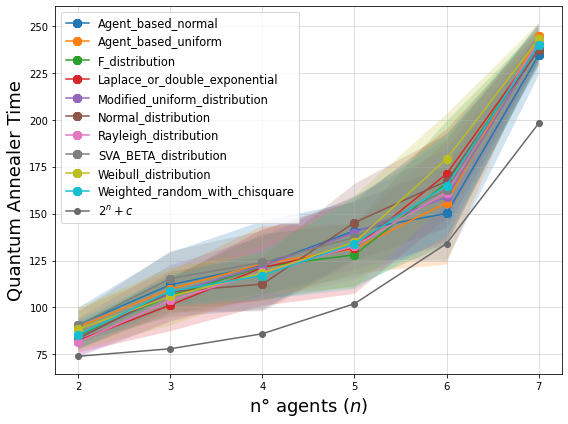

In [79]:
font=18

fig, ax = plt.subplots(figsize=(8,6))
for i, g in data.groupby('distribution'):
    g.plot(x='n_agents', y='time', ax=ax, label=str(i), style='o-', marker='8', markersize=8)#, yerr='std_acc')
    plt.fill_between(x=g['n_agents'], y1 = g['time'] - g['std'], y2 = g['time'] + g['std'], alpha=0.2)

plt.grid(alpha=0.5)
plt.ylabel('Quantum Annealer Time',fontdict={'fontsize':font})
# #plt.yticks(fontsize=16)
plt.xlabel(r'n° agents $(n)$',fontdict={'fontsize':font})


n = np.arange(2,8)
plt.plot(n, 2**n+70,  '-ok', color='dimgray', label=r'$2^n+c$')

plt.legend(fontsize=11.5)#bbox_to_anchor=(.5, -0.35), loc='lower center', fontsize=24, ncol=5, borderaxespad=0.1)
plt.tight_layout()

plt.savefig('output/QA.png')